## Install Package

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6224, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 6224 (delta 6), reused 6 (delta 2), pack-reused 6205
Receiving objects: 100% (6224/6224), 13.48 MiB | 18.12 MiB/s, done.
Resolving deltas: 100% (4207/4207), done.


In [ ]:
!pip install keras_retinanet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras_retinanet: filename=keras_retinanet-1.0.0-cp310-cp310-linux_x86_64.whl size=173603 sha256=d28ad2677c5de2ed0e5c07b705cec425ca7a34858a6ddc05cd1341afaeaf3a4c
  Stored in directory: /root/.cache/pip/wheels/42/ee/d4/b54905a92241002b36db880e88b902ebcb015ce5ae311a16da
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20459 sha256=af06ec9a66932806c4bdb65613071f51da01b88105c41088f492eb2204031639
  Stored in directory: /root/.cache/pip/wheels/16/af/88/a668b279c5eadbe55dcaf6207f09059135166cefb09088bacc
Successfully built keras_retinanet keras-resnet


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


processing time:  8.036616086959839


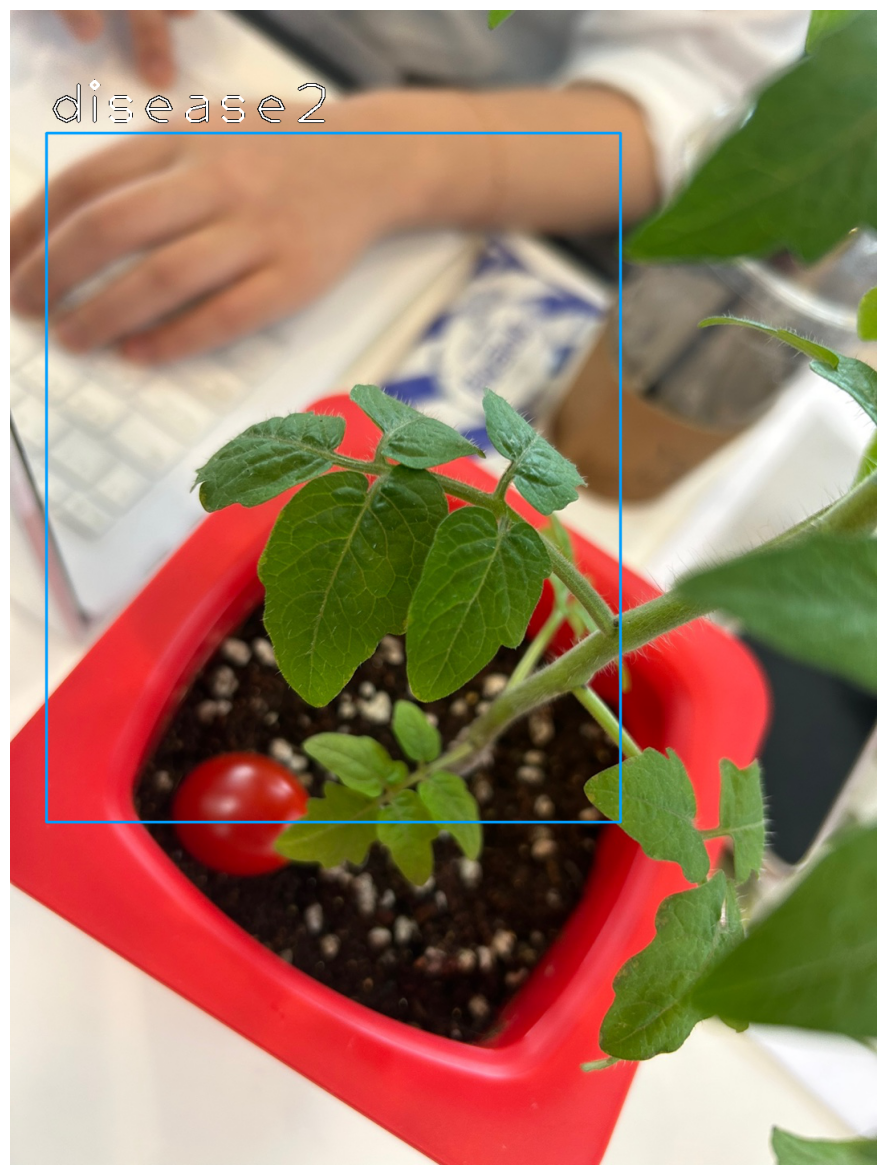

In [ ]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
from keras_retinanet.utils.colors import label_color

# use this to change which GPU to use
gpu = 0

# load retinanet model
model = models.load_model('/content/drive/MyDrive/tomato/resnet50_csv_13_infer.h5', backbone_name='resnet50')

# load label to names mapping for visualization purposes
labels_to_names = {0:'normal',2:'disease1',1:'disease2'}

# load image
image = read_image_bgr('/content/KakaoTalk_20230708_150710910.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale



for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.45:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(draw, b, color=color)

    caption = "{}".format(labels_to_names[label])  # 스코어 생략
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 5, (0, 0, 0), 3)
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 5, (255, 255, 255), 2)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()